In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [120]:
p = 0.6

ks = list(range(2,10))
N = 10000
rights = np.zeros(len(ks))
lefts = np.zeros(len(ks))

for i, k in enumerate(ks):
    print(k)
    for run in range(N):
        walk = ((np.random.random((10000)) > p)*2 - 1).cumsum().astype(int)+1
        if k in walk and 0 in walk:
            if (np.where(walk == k)[0][0] < np.where(walk == 0)[0][0]):
                rights[i] += 1
            else:
                lefts[i] += 1
        else:
            if k in walk:
                rights[i] += 1
            else:
                lefts[i] += 1

2
3
4
5
6
7
8
9


In [111]:
rights

array([4514., 2649., 1800., 1320.,  959.,  745.,  538.,  398.])

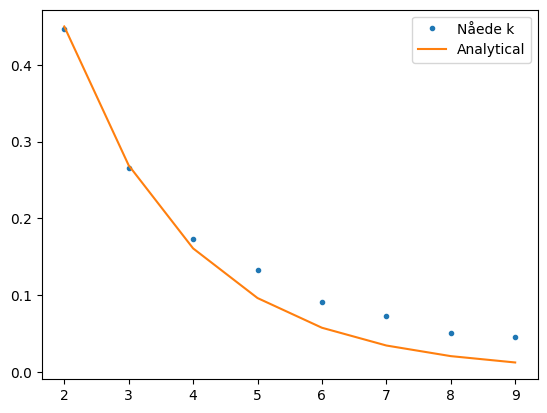

In [119]:
@np.vectorize
def f(p, k):
    return (1/(1/(1-p) - p))**(k-2)*(1-p)


plt.plot(ks, rights/N, '.', label="Nåede k")
plt.plot(ks, f(p, ks), label="Analytical")
plt.legend()
plt.show()

In [4]:
(np.load("runs/2000_sphere_properties.npy") == 1).mean()

1.0

In [8]:
b = 3
p = 1.6075
N = 2000
beta = 5
np.sqrt(1/((2+1/b**p)/3)**(1/p) *(N)*beta/(2*b*4*np.pi))

12.735267596740327

In [2]:
import numpy as np

In [19]:
prop = np.load("runs/2000_better_egg_genius_moremore_properties.npy")
poss = np.load("runs/2000_better_egg_genius_moremore.npy")[-1][:,0]

In [9]:
from InitialConditions import egg_shape

In [20]:
poss.shape

(2000, 3)

In [25]:
import h5py
import numpy as np

In [59]:
testarr1 = np.array([1,2,3,4,5])
testarr2 = np.ones((5,5)).astype(float)


from jax_enums import Enumerable
class BC(Enumerable):
    NONE = 0
    SPHERE = 1
    EGG = 2
    BETTER_EGG = 3

test_attributes = {"len": 5, "name": "test", "enum" : BC.BETTER_EGG}


In [60]:
with h5py.File("test_data.hdf5", "w") as f:
    f.create_dataset("test1", data=testarr1)
    f.create_dataset("test2", data=testarr2)
    f.attrs.update(test_attributes)



TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [57]:
with h5py.File("test_data.hdf5", "r") as f:
    testarr1 = f["test1"][:]
    testarr2 = f["test2"][:]
    test_attributes = dict(f.attrs.items())

print(testarr1)
print(testarr2)
print(test_attributes)

[1 2 3 4 5]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
{'len': 5, 'name': 'test'}


In [23]:
# p2 = prop.copy()

# cell_properties = jnp.where(cells[:,0,:][:,2] < egg_shape[2]/2, 0., 1.)
p2 = np.where(poss[:,2] < egg_shape[2]/2, 0., 1.)
# cell_properties = jnp.where(cells[:,0,:][:,0] < -egg_shape[0]/2, 1., cell_properties)
p2 = np.where(poss[:,0] < -egg_shape[0]/2, 1., p2)


# np.save("runs/2000_better_egg_more.npy", poss)
# np.save("runs/2000_better_egg_genius_moremore_properties.npy", p2)

In [22]:
print((p2==prop).mean())

0.9605
